In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh') 
import seaborn as sns 
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

In [3]:
#Read the input file
df = pd.read_csv("C:/Users/Arunima/OneDrive/Documents/GitHub/Fifa20/players_20.csv")

In [4]:
#Display the structure of the dataset
df.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [5]:
#Display the shape of the dataset 
df.shape

(18278, 104)

In [6]:
#Check the missing values in the dataset based on columns
df1 = df.isnull().sum().sort_values(ascending=False)
df1.head(20)

loaned_from             17230
nation_jersey_number    17152
nation_position         17152
player_tags             16779
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
rb                       2036
st                       2036
ls                       2036
dribbling                2036
shooting                 2036
rcb                      2036
pace                     2036
lw                       2036
passing                  2036
dtype: int64

In [7]:
#11 columns have almost 90% missing data. In this case we will drop these columns
df.drop(['loaned_from','nation_jersey_number','nation_position','player_tags','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits'],inplace=True, axis=1)
df.shape

(18278, 93)

In [8]:
#Checking the number of players in top 10 countries
df['nationality'].value_counts()[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [9]:
#Pie chart to show the ratio of players in the dataset

England = len(df[df['nationality'] == 'England'])
Germany = len(df[df['nationality'] == 'Germany'])
Spain = len(df[df['nationality'] == 'Spain'])
France = len(df[df['nationality'] == 'France'])
Argentina = len(df[df['nationality'] == 'Argentina'])
Brazil = len(df[df['nationality'] == 'Brazil'])
Italy = len(df[df['nationality'] == 'Italy'])
Colombia = len(df[df['nationality'] == 'Colombia'])
Japan = len(df[df['nationality'] == 'Japan'])
Netherlands = len(df[df['nationality'] == 'Netherlands'])

labels = 'England','Germany','Spain','France','Argentina','Brazil','Italy','Colombia','Japan','Netherlands'
sizes = [England,Germany,Spain,France,Argentina,Brazil,Italy,Colombia,Japan,Netherlands]
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

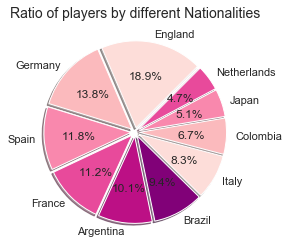

In [26]:
#Formatting the plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("RdPu"),
autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('Ratio of players by different Nationalities', fontsize=14)
plt.show()

In [ ]:
#Top 5 countries - England,Germany,Spain,France,Argentina comstitute of around 60% of the total players
#These are also the countries which have highest number of internal leagues

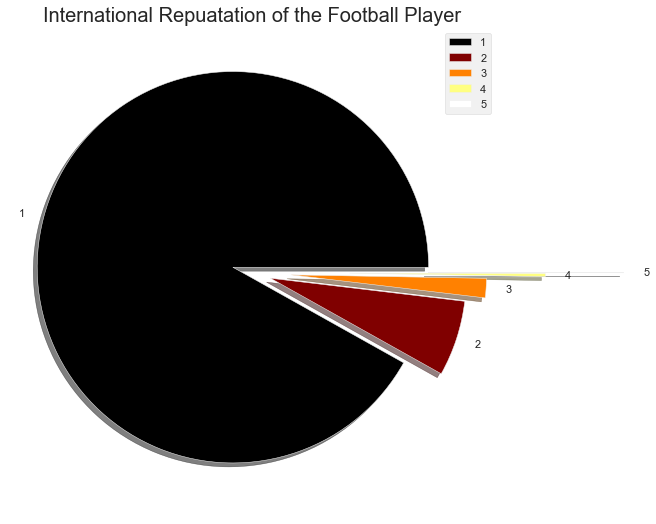

In [46]:
#Pie chart to represent share of international repuatation
#Creating a function to create piecharts 
def piechart(variable, title, color):
    labels = ['1', '2', '3', '4', '5']
    variable = variable.value_counts()
    explode = [0.1, 0.1, 0.2, 0.5, 0.9]
    plt.rcParams['figure.figsize'] = (9, 9)
    plt.pie(variable, labels = labels, colors = color, explode = explode, shadow = True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

piechart(df['international_reputation'], 'International Repuatation of the Football Player', plt.cm.afmhot(np.linspace(0, 1, 5)))

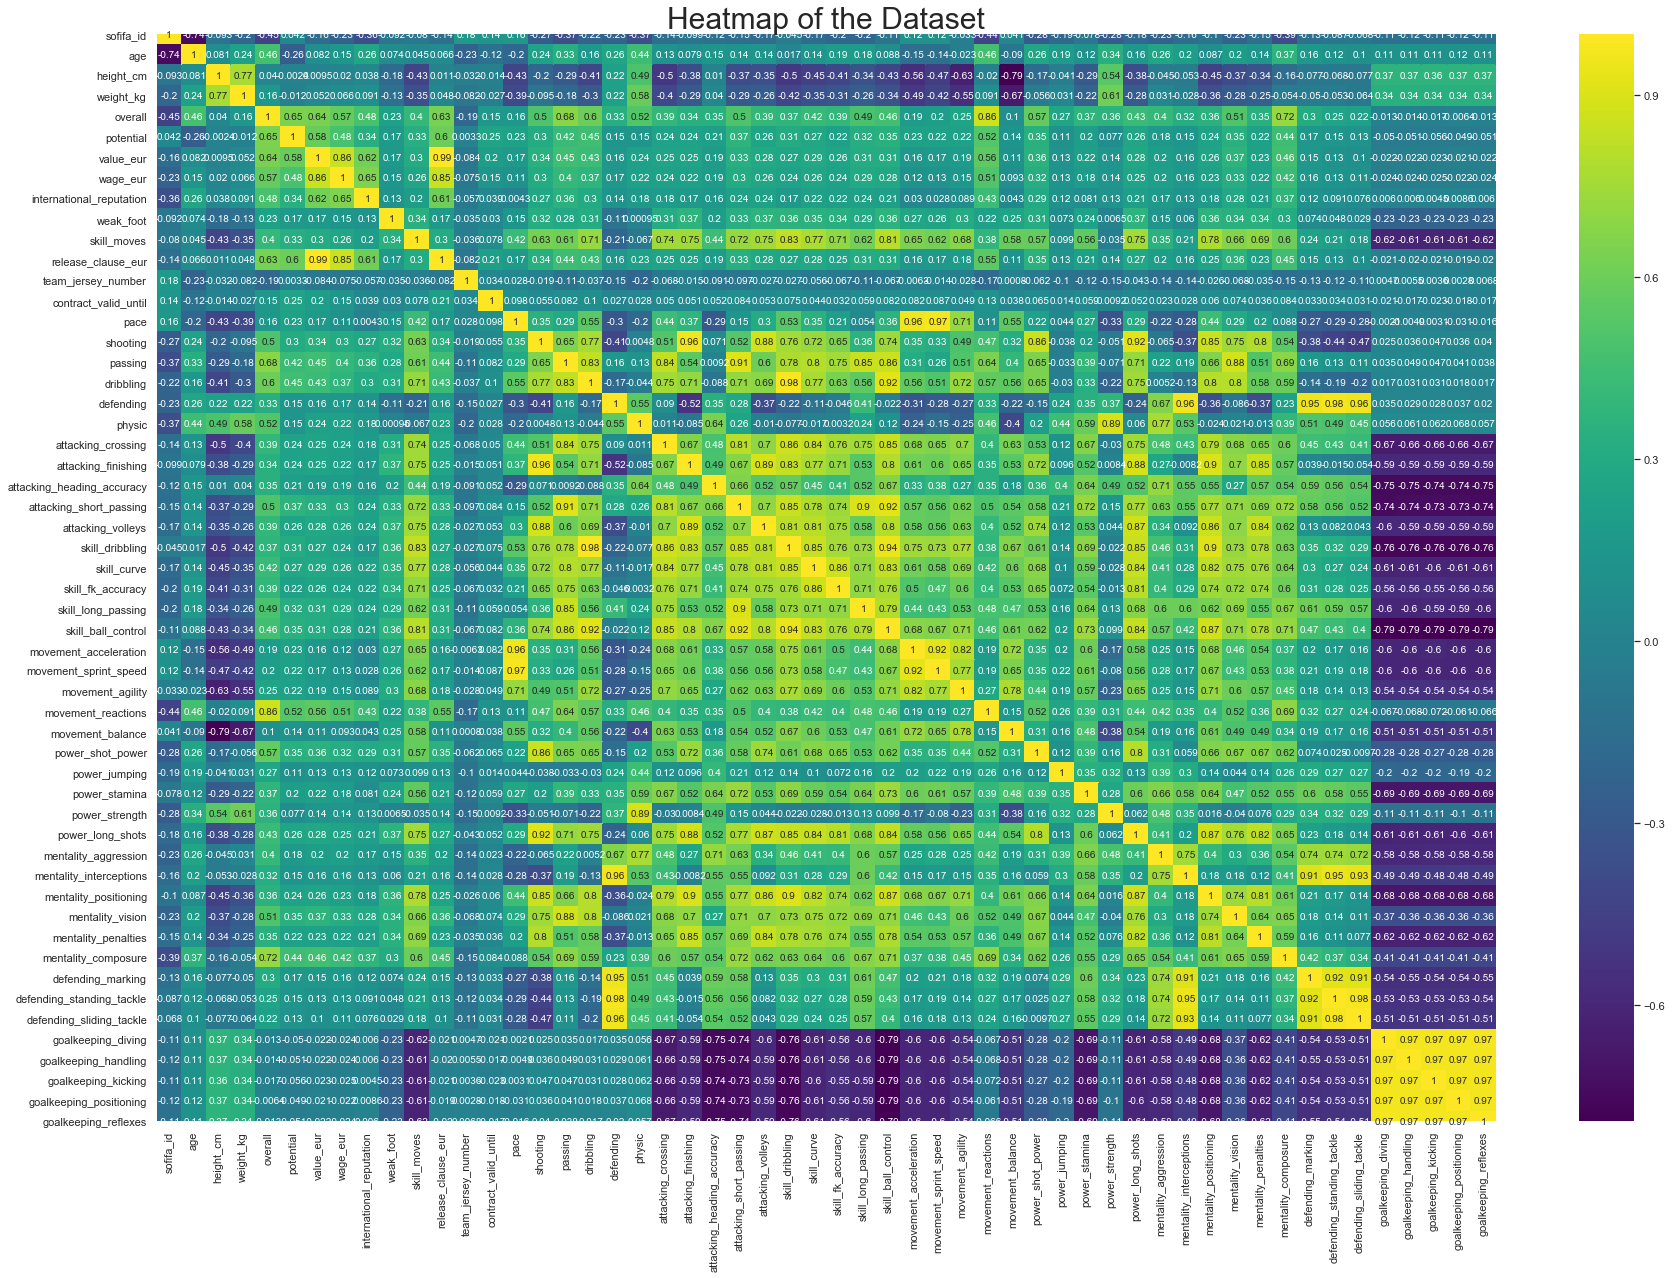

In [33]:
#Checking the correlation between the features
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

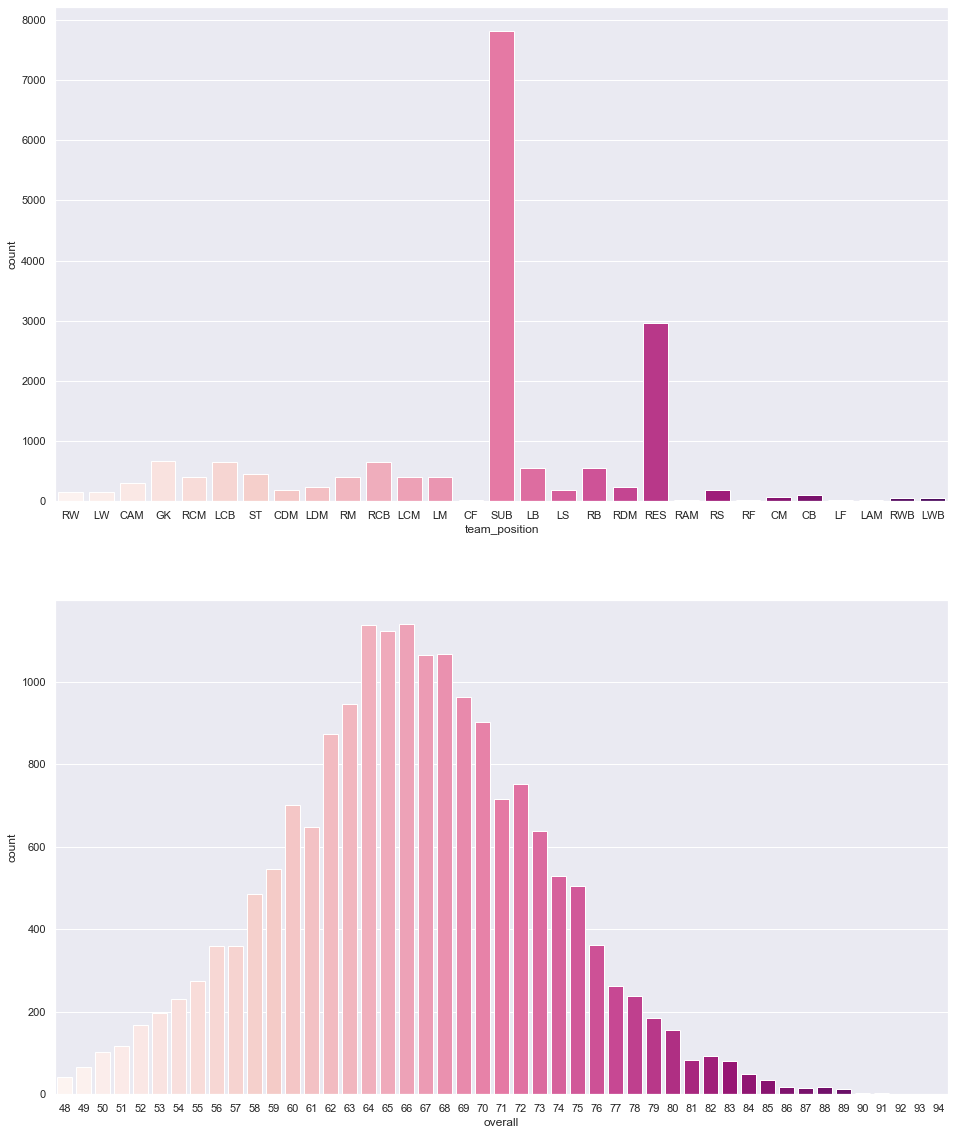

In [24]:
#Number of players by Position and Overall

sns.set(style="darkgrid")
fig, axs = plt.subplots(nrows=2, figsize=(16, 20))
sns.countplot(df['team_position'], palette="RdPu", ax=axs[0])
sns.set(style="darkgrid")
sns.countplot(df['overall'], palette="RdPu",ax=axs[1])

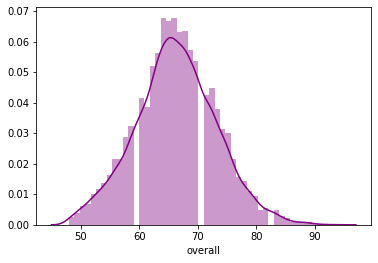

In [12]:
#We check the distribution of the overall rating
sns.distplot(df['overall'], color="Purple")

In [ ]:
#We see that the average overall value is around 65. The data is normally distributed.

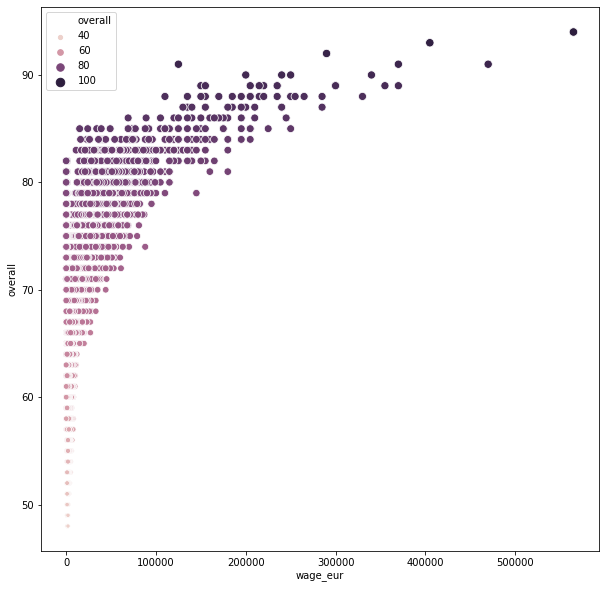

In [13]:
#Checking the relationship between overall rating and wage
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="wage_eur",y="overall", hue="overall", size="overall", data=df)


In [ ]:
#The overall value is positively correlated with the wages of the player. 

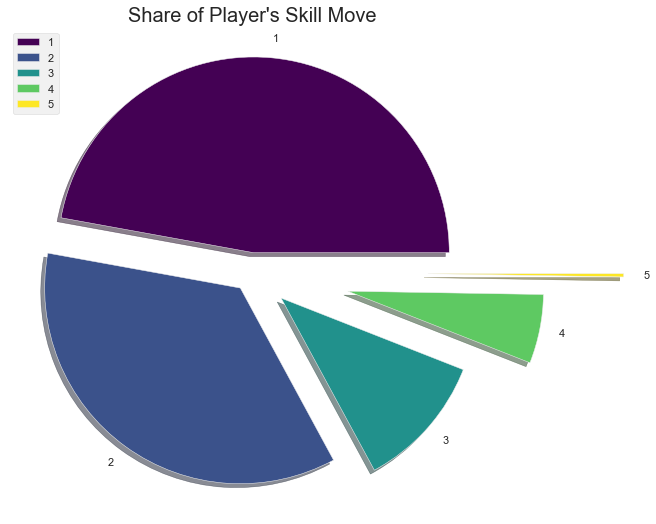

In [47]:
#Pie chart to represent share of Player's Skill Move
piechart(df['skill_moves'], "Share of Player's Skill Move", plt.cm.viridis(np.linspace(0, 1, 5)))